<a href="https://colab.research.google.com/github/rashidmeras/EVA_PHASE1/blob/master/EVA_S6_Assignment_6B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVA (M6) Session6 Assignment 6B: 

Objective:

> Using the network defined in Assignment 6A change the code to include:

> * Normal Convolution
> * Separable Convolution 
> * Depthwise Convolution
> * Grouped Convolution (use 3x3, 5x5 only)
> * Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 

Must use all of the 5 above at least once and train this new model for 50 epochs. 

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(900) 
from keras.models import Model, Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Conv2D, Activation, Flatten, Dropout, Input, Lambda, Dense
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras.layers.merge import concatenate
from keras.optimizers import Adam, SGD
from keras.layers.advanced_activations import ReLU

# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from keras import backend as k

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 14s 0us/step


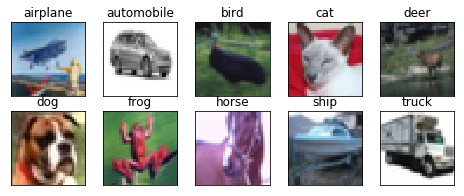

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

##Part 1 - Sequential Network (from Assignment 6A)

In [0]:
# Define the model
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', use_bias=False, border_mode='same', kernel_regularizer=regularizers.l2(0.01), input_shape=(32, 32, 3))) 
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3, activation='relu', use_bias=False, border_mode='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3, activation='relu', use_bias=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3, activation='relu', use_bias=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 1, 1, activation='relu', use_bias=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer: Max-Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3, activation='relu', use_bias=False, border_mode='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3, activation='relu', use_bias=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3, activation='relu', use_bias=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 1, 1, activation='relu', use_bias=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer: Max-Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Convolution2D(64, 3, 3, activation='relu', use_bias=False, border_mode='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, 3, activation='relu', use_bias=False, border_mode='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3, activation='relu', use_bias=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(num_classes, 3, 3, use_bias=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Layer9: Flatten & activation
model.add(Flatten())
model.add(Activation('softmax'))

#Print model summary
model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False, kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", use_bias=False, kernel_regularizer=<keras.reg..., padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", use_bias=False, kernel_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), act

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        864       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        18432     
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 30, 30, 64)        36864     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), use_bias=False, kernel_regularizer=<keras.reg...)`


## Part2: Functional Network

In [0]:
def space_to_depth_x2(x):
    return tf.space_to_depth(x, block_size=2)

# Use Type1: uses 3x3, 5x5 only
# Use Type2: uses 3x3 only
def grouped_convolution(y, nb_channels_in, _strides, use_type='Type_3x3'):

    # in this grouped convolution layer, input and output channels are divided into 32 groups,
    # and convolutions are separately performed within each group
    groups = []
    
    _d = nb_channels_in // 32
          
    if (use_type=='Type_3x3'):      
       for j in range(32):
            group = Lambda(space_to_depth_x2)(y)
            groups.append(Conv2D(_d, kernel_size=(3, 3), strides=_strides, padding='same')(group))
    
    if (use_type=='Type_5x5'):
       for j in range(32):
            group = Lambda(space_to_depth_x2)(y)
            groups.append(Conv2D(_d, kernel_size=(5, 5), strides=_strides, padding='same')(group))      
      
    
    # the grouped convolutional layer concatenates them as the outputs of the layer
    y = concatenate(groups)

    return y

def add_common_layers(y):
    y = BatchNormalization()(y)
    y = ReLU()(y)  
    
    return y

In [43]:
img_height = 32
img_width = 32
channel = 3
  
input = Input(shape=(img_height, img_width, channel))

# Layer1: Normal Convolution
x = Conv2D(32, (3,3), activation='relu', use_bias=False, padding='same', name='L1_Norm_Conv')(input)
layer1 = add_common_layers(x)

# Layer2: Spatially Speprable Convolution
x = SeparableConv2D(64, (3, 3), activation='relu', use_bias=False, name='L2_Spat_Sep_Conv')(layer1)
layer2 = add_common_layers(x)

# Layer3: Depthwise Seperable Convolution
x = SeparableConv2D(1, (3, 3), activation='relu', use_bias=False, name='L3a_Dep_Sep_Conv')(layer2)
x = SeparableConv2D(128, (1, 1), activation='relu', use_bias=False, name='L3b_Dep_Sep_Conv')(x)
layer3 = add_common_layers(x)

# Layer4: Grouped Convolution Type1: (use 3x3 only with dilation = 1) 
x = grouped_convolution(layer3, 128, 1, 'Type_3x3')
x = add_common_layers(x)

# Layer4: Grouped Convolution Type1: (use 3x3 only with dilation = 2) 
x = grouped_convolution(x, 256, 2, 'Type_3x3')
layer4 = add_common_layers(x)

# Layer5: Grouped Convolution Type2: use 3x3
x = grouped_convolution(layer4, 128, 1, 'Type_3x3')
x = add_common_layers(x)

# Layer5: Grouped Convolution Type2: use 5x5
x = grouped_convolution(x, 128, 1, 'Type_5x5')
layer5 = add_common_layers(x)

# Layer6: Output layer
x = Conv2D(num_classes, (1,1), use_bias=False, padding='same', name='L6_Norm_Conv')(layer5)
layer6 = BatchNormalization()(x)

# Layer7: Flatten & activation
flat_layer = Flatten()(layer6)
# output = Activation('softmax')(flat_layer)
output = Dense(num_classes, activation='softmax')(flat_layer)

model = Model(inputs=[input], outputs=[output])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
L1_Norm_Conv (Conv2D)           (None, 32, 32, 32)   864         input_20[0][0]                   
__________________________________________________________________________________________________
batch_normalization_19 (BatchNo (None, 32, 32, 32)   128         L1_Norm_Conv[0][0]               
__________________________________________________________________________________________________
re_lu_14 (ReLU)                 (None, 32, 32, 32)   0           batch_normalization_19[0][0]     
__________________________________________________________________________________________________
L2_Spat_Se

In [42]:

# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

model.fit(train_features, train_labels,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(test_features, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 155s 3ms/step - loss: 1.6399 - acc: 0.4135 - val_loss: 1.8984 - val_acc: 0.3676


##Image Normalization

In [44]:
# train_features 
# test_features 
# # convert class labels to binary class labels
# train_labels 
# test_labels 

# confirm scale of pixels
print('Train min=%.3f, max=%.3f' % (train_features.min(), train_features.max()))
print('Test min=%.3f, max=%.3f' % (test_features.min(), test_features.max()))

batch_size = 128

# create generator that centers pixel values
datagen = ImageDataGenerator(     
                              featurewise_center=True, 
                              featurewise_std_normalization=True,
                              samplewise_center=True,
                              samplewise_std_normalization=True
                             )

# calculate mean on training dataset
datagen.fit(train_features)

# print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# prepare an iterators to scale images
train_iterator = datagen.flow(train_features, train_labels, batch_size, shuffle=False)
test_iterator = datagen.flow(test_features, test_labels, batch_size, shuffle=False)

print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))

Train min=0.000, max=1.000
Test min=0.000, max=1.000
Batches train=391, test=79


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.1.
391/391 [==============================] - 155s 397ms/step - loss: 0.2574 - acc: 0.9048 - val_loss: 0.5867 - val_acc: 0.8200

Epoch 00001: val_acc improved from -inf to 0.82000, saving model to best_new_model.h5
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.1.
391/391 [==============================] - 133s 341ms/step - loss: 0.2144 - acc: 0.9171 - val_loss: 0.5952 - val_acc: 0.8200

Epoch 00002: val_acc did not improve from 0.82000
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.1.
391/391 [==============================] - 133s 340ms/step - loss: 0.1809 - acc: 0.9297 - val_loss: 0.7027 - val_acc: 0.8200

Epoch 00003: val_acc did not improve from 0.82000
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.1.
391/391 [==============================] - 133s 340ms/step - loss: 0.1524 - acc: 0.9410 - val_loss: 0.5487 - val_acc: 0.8200

Ep

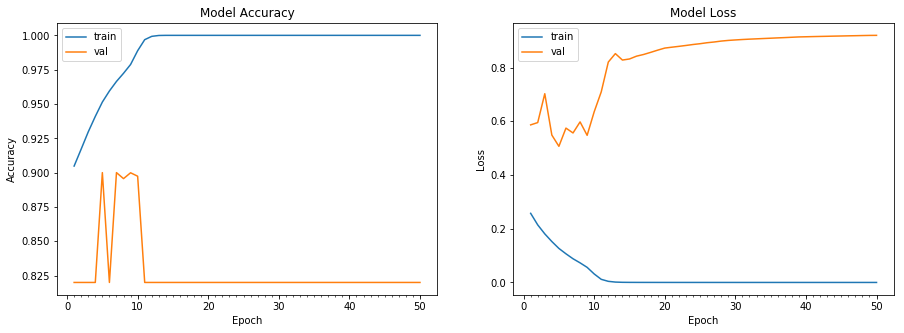

Accuracy on test data is: 10.00


In [45]:
import math
import numpy as np
from keras.optimizers import Adam, SGD
from keras.callbacks import LearningRateScheduler

# Define custom loss
def custom_loss(actual,predicted):
    sqr_w = 0
    lamda = 0.01 #1e-4
    
    for layer in model.layers:
       sqr_w += sqr_w + np.sum(np.sum(np.sum(np.square(layer.get_weights()))))
            
    l2_regularization = (lamda*sqr_w)/2*(batch_size)    
    loss = K.categorical_crossentropy(actual,predicted) + l2_regularization
    
    # Return a function
    return loss

# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
  
model.compile(optimizer= sgd,
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

save_mcp = ModelCheckpoint('best_new_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# train the model
start = time.time()
# Train the model
history = model.fit_generator(train_iterator, 
                              steps_per_epoch=len(train_iterator), 
                              epochs=50, 
                              validation_data=(test_features, test_labels),
                              callbacks=[save_mcp, LearningRateScheduler(step_decay, verbose=1)], 
                              verbose=1)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(history)

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))